# DSCI100: Wine Quality Data Set Report

## Alexandria Ahluwalia, Daniel Alimohd

# Introduction

`Introduction:
provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
clearly state the question you tried to answer with your project
identify and describe the dataset that was used to answer the question`

What makes a good wine? What separates an okay glass of wine from a great glass of wine? Many will answer these questions with a certain growing region, winery, or grape variety. But we would like to take this analysis further and see what top chemical factors are responsible for differentiating the quality of wine. We will perform our analysis by using the wine quality data set. This data set contains observations from a variety of Red and White Vinho Verde (wine only from a special region in Portugal). Each separate wine observation contains its perceived “quality” from wine experts and information on the content of alcohol, sugar, acidity, density, citric acid, sulfur dioxide, pH, and sulphates. The quality in the data set is measured on a scale from 0 to 10. Through the analysis of this information, we hope to find trends for which chemical factors have the most significant impact on wine quality and what makes both the red and white Vinho Verde wines good.



<img src="https://images.immediate.co.uk/volatile/sites/2/2019/02/Wine-header-4e686a2.jpg?quality=45&resize=960,413"  width="400">

<h3>Methods & Results</h3>

`describe in written english the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.`

`your report should include code which:`
* loads data from the original source on the web 
* wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned classification or clustering analysis
* performs a summary of the data set that is relevant for exploratory data analysis related to the planned classification, regression or clustering analysis 
* creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned classification or clustering analysis
* performs either a classification, regression or clustering analysis
* creates a visualization of the classification, regression  or clustering analysis 

`note: all tables and figure should have a figure/table number and a legend`

## Expected outcomes and significance

`Expected outcomes and significance:
What do you expect to find?
What impact could such findings have?
What future questions could this lead to?`

## Loading in our data
Here we load in our two data sets. We are going to combine both the red and white data sets to do analysis on all wines together. Our data set is almost good enough to perform analysis on, however we will change the column names to make them easier to work with in R and we also removed two observations with missing measurements. 

In [3]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)
install.packages("GGally")
install.packages("gridExtra")
library(GGally)
library(gridExtra)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [4]:
# reading in our data
red_wine <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                    delim=";")
white_wine <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", 
                    delim=";")

# eliminating whitespace in column names
names(red_wine) <- gsub(" ","_", names(red_wine))
names(white_wine) <- gsub(" ","_", names(white_wine))


# combining our two wine data sets
wine <- bind_rows(list(white = white_wine , red = red_wine), .id = "type") %>%
    # Removing rows with NA's to supress warnings (there's only two of them with n/a SO2)
    na.omit()

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_integer(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_integer()
)
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col                  expected               actual file                 expected   <int> <chr>                <chr>                  <chr>  <chr>                actual 1  1296 total sulfur dioxide no trailing characters .5     'https://archive.ic… file 2  1297 total sulfur dioxide no trailing characters .5     'https://archive.ic…
”Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),

## A quick look at our data

Our data set has more white wine observations than red wine and the most common quality is a level 6 with 2836 of the 6495 observations. The quality in the data set is measured on a subjective scale from 0 to 10 from wine testers, but only quality ratings from 3 to 9 appear in the data set.

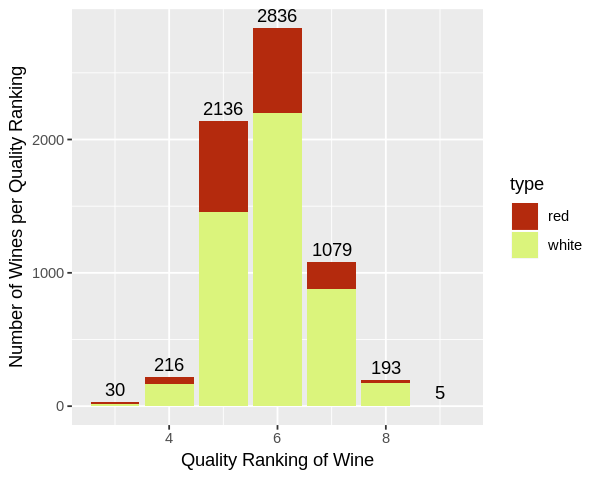

In [5]:
options(repr.plot.width=5,repr.plot.height=4)

quality_distribution <- ggplot(wine, aes(x = quality)) +
    xlab("Quality Ranking of Wine") +
    ylab("Number of Wines per Quality Ranking") +
    geom_bar(stat="count", aes(fill = type)) + scale_fill_manual(values=c("#B42A0D", "#DBF47C")) +
    geom_text(stat='count', aes(label=..count..), vjust=-(1/2))
quality_distribution

# src:https://stackoverflow.com/questions/26553526/how-to-add-frequency-count-labels-to-the-bars-in-a-bar-graph-using-ggplot2/26556180

In [6]:
glimpse(wine)
summary(wine)

Observations: 6,495
Variables: 13
$ type                 <chr> "white", "white", "white", "white", "white", "...
$ fixed_acidity        <dbl> 7.0, 6.3, 8.1, 7.2, 7.2, 8.1, 6.2, 7.0, 6.3, 8...
$ volatile_acidity     <dbl> 0.27, 0.30, 0.28, 0.23, 0.23, 0.28, 0.32, 0.27...
$ citric_acid          <dbl> 0.36, 0.34, 0.40, 0.32, 0.32, 0.40, 0.16, 0.36...
$ residual_sugar       <dbl> 20.70, 1.60, 6.90, 8.50, 8.50, 6.90, 7.00, 20....
$ chlorides            <dbl> 0.045, 0.049, 0.050, 0.058, 0.058, 0.050, 0.04...
$ free_sulfur_dioxide  <dbl> 45, 14, 30, 47, 47, 30, 30, 45, 14, 28, 11, 17...
$ total_sulfur_dioxide <dbl> 170, 132, 97, 186, 186, 97, 136, 170, 132, 129...
$ density              <dbl> 1.0010, 0.9940, 0.9951, 0.9956, 0.9956, 0.9951...
$ pH                   <dbl> 3.00, 3.30, 3.26, 3.19, 3.19, 3.26, 3.18, 3.00...
$ sulphates            <dbl> 0.45, 0.49, 0.44, 0.40, 0.40, 0.44, 0.47, 0.45...
$ alcohol              <dbl> 8.8, 9.5, 10.1, 9.9, 9.9, 10.1, 9.6, 8.8, 9.5,...
$ quality         

     type           fixed_acidity    volatile_acidity  citric_acid    
 Length:6495        Min.   : 3.800   Min.   :0.0800   Min.   :0.0000  
 Class :character   1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500  
 Mode  :character   Median : 7.000   Median :0.2900   Median :0.3100  
                    Mean   : 7.215   Mean   :0.3396   Mean   :0.3187  
                    3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900  
                    Max.   :15.900   Max.   :1.5800   Max.   :1.6600  
 residual_sugar     chlorides       free_sulfur_dioxide total_sulfur_dioxide
 Min.   : 0.600   Min.   :0.00900   Min.   :  1.00      Min.   :  6.0       
 1st Qu.: 1.800   1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0       
 Median : 3.000   Median :0.04700   Median : 29.00      Median :118.0       
 Mean   : 5.444   Mean   :0.05602   Mean   : 30.52      Mean   :115.8       
 3rd Qu.: 8.100   3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0       
 Max.   :65.800   Max.   :0.61100   Max. 

## Scaling our data
Before making our analysis, we will make sure that our quantitative variables are scaled prior to making analysis, this will help reduce bias and skewed results that we may get from some variables form of measurement being on a greater scale than others.

In [16]:
scaled_wine <- wine %>%
  mutate(fixed_acidity = as.numeric(scale(fixed_acidity, center = FALSE)),
         volatile_acidity = as.numeric(scale(volatile_acidity, center = FALSE)),
         citric_acid = as.numeric(scale(citric_acid, center = FALSE)),
         residual_sugar = as.numeric(scale(residual_sugar, center = FALSE)),
         chlorides = as.numeric(scale(chlorides, center = FALSE)),
         free_sulfur_dioxide = as.numeric(scale(free_sulfur_dioxide, center = FALSE)),
         total_sulfur_dioxide = as.numeric(scale(total_sulfur_dioxide, center = FALSE)),
         density = as.numeric(scale(density, center = FALSE)),
         pH = as.numeric(scale(pH, center = FALSE)),
         sulphates = as.numeric(scale(sulphates, center = FALSE)),
         alcohol = as.numeric(scale(alcohol, center = FALSE)),
         volatile_acidity = as.numeric(scale(volatile_acidity, center = FALSE)),
         volatile_acidity = as.numeric(scale(volatile_acidity, center = FALSE)),
        )

## Exploratory Analysis
For our exploratory analysis we will use ggpair to plot all the variables of our wine to get an idea on what variables may be important to consider.  We will consider the charts as well as the correlation values with are further looked upon by looking at the ggcorr heat map. Finally, we will plot every variable against quality with an overlaid loess geom_smooth line, which should help give an idea of what to expect when we do k-nn regression on each variable. We found this plotting usually resulted in clustering on the left side of the chart so we have scaled the x-axis on a logarithmic scale by using scale_x_log10().


In [8]:
ggpair_plot <- ggpairs(scaled_wine, mapping = aes(color = type, alpha=1/10), columns = 2:13)

correlations <- ggcorr(scaled_wine, label = TRUE, label_round = 2)

Warning message in ggcorr(scaled_wine, label = TRUE, label_round = 2):
“data in column(s) 'type' are not numeric and were ignored”

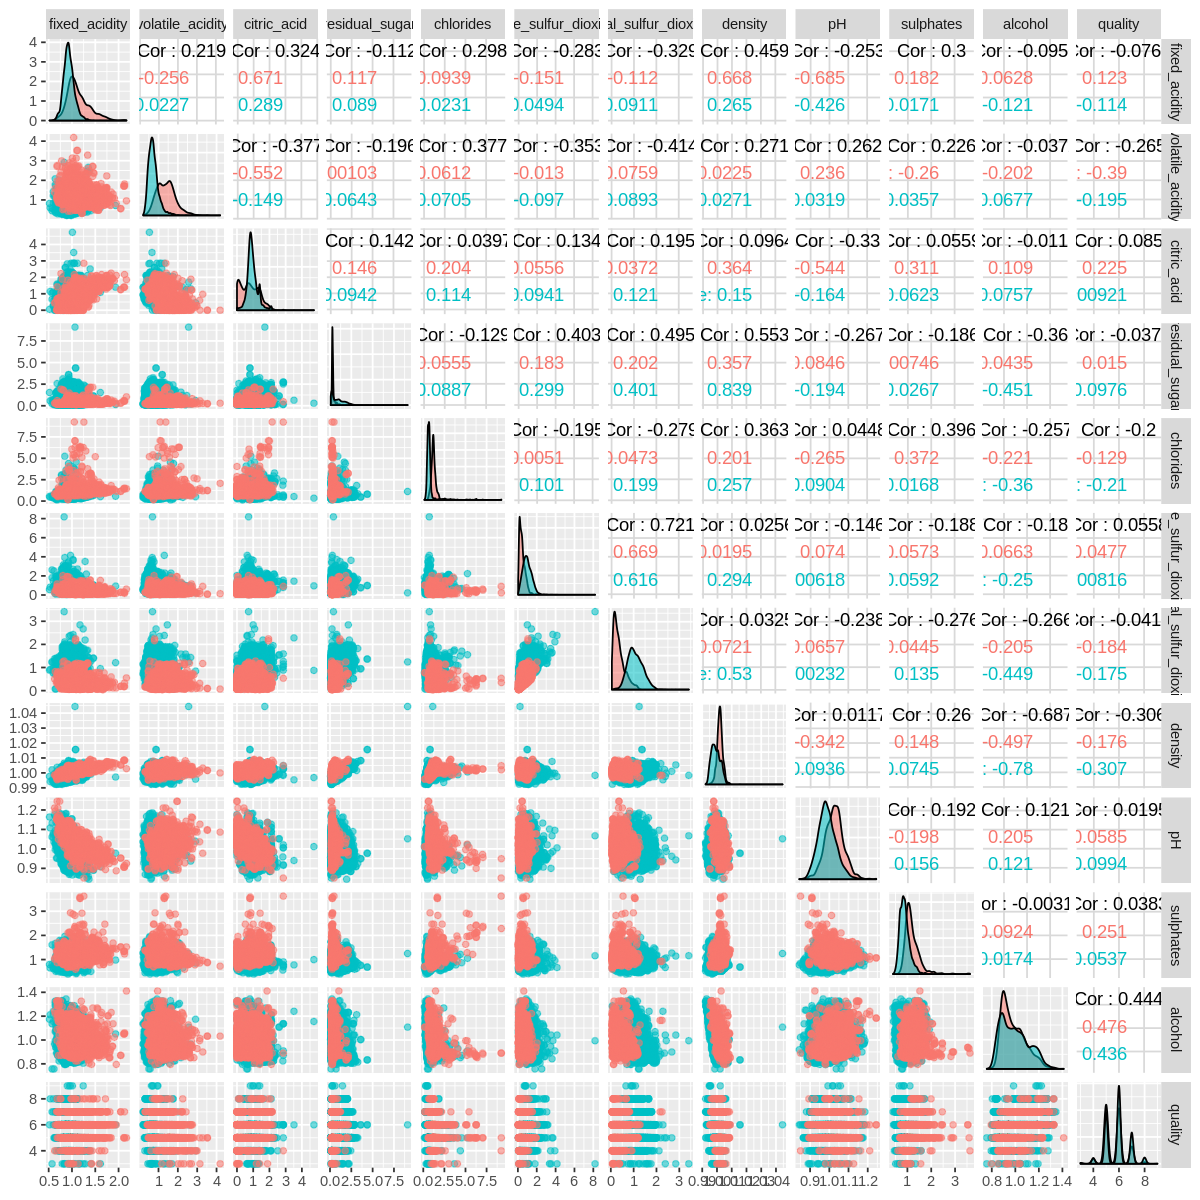

In [9]:
options(repr.plot.width=10,repr.plot.height=10)
ggpair_plot

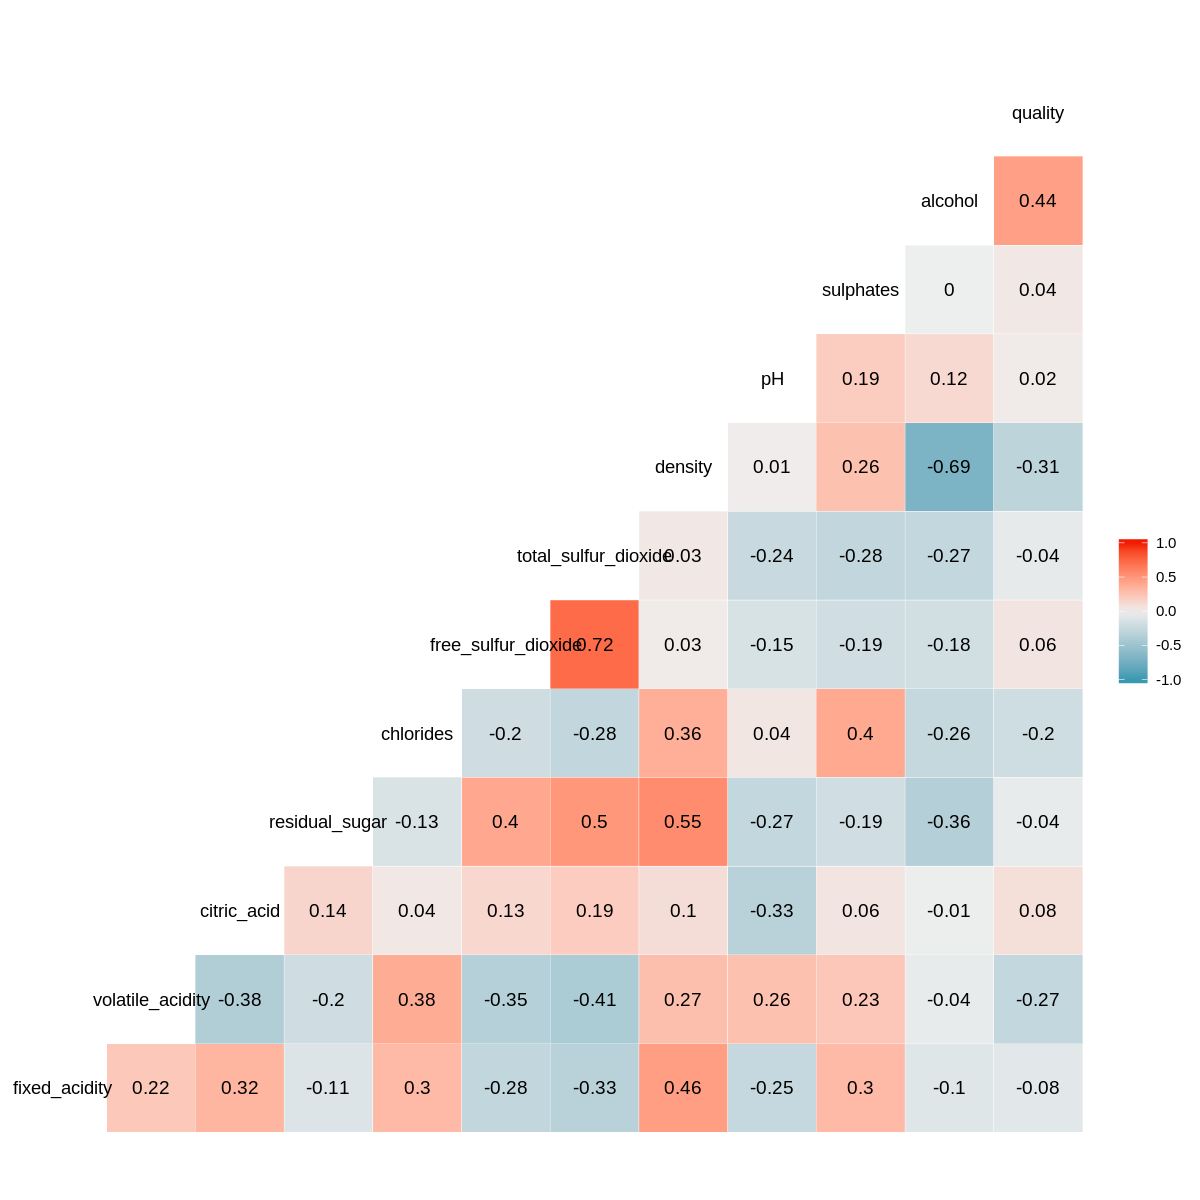

In [10]:
correlations

Warning message:
“Removed 3 rows containing missing values (geom_point).”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”

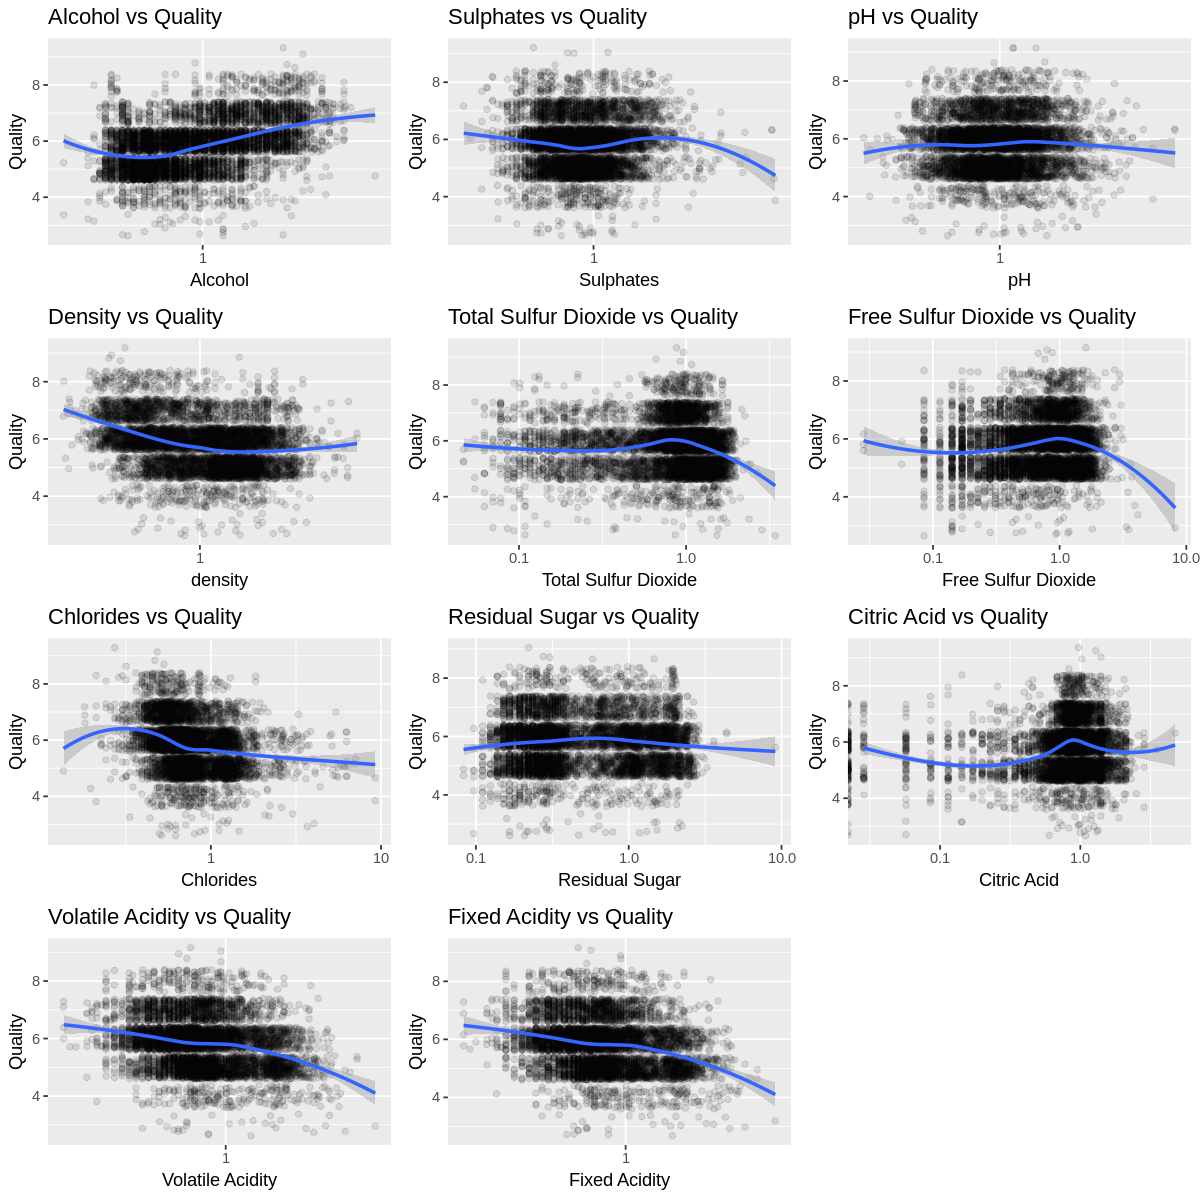

In [11]:
# The loess smoothing method appears to be in line with k-nn regression we are trying to do. It's what I have picked
# for smoothing lines in the charts for now, but will also do the typical k-nn calculations..
# https://blogs.sas.com/content/iml/2016/10/17/what-is-loess-regression.html


options(repr.plot.width=10,repr.plot.height=10)

alcohol_plot <- ggplot(scaled_wine, aes(x = alcohol, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Alcohol") + 
    ylab("Quality") +
    ggtitle("Alcohol vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

sulphates_plot <- ggplot(scaled_wine, aes(x = sulphates, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Sulphates") + 
    ylab("Quality") +
    ggtitle("Sulphates vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

pH_plot <- ggplot(scaled_wine, aes(x = pH, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("pH") + 
    ylab("Quality") +
    ggtitle("pH vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

density_plot <- ggplot(scaled_wine, aes(x = density, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("density") + 
    ylab("Quality") +
    ggtitle("Density vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10(limits=c(NA, 1.01))

total_sulfur_dioxide_plot <- ggplot(scaled_wine, aes(x = total_sulfur_dioxide, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Total Sulfur Dioxide") + 
    ylab("Quality") +
    ggtitle("Total Sulfur Dioxide vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

free_sulfur_dioxide_plot <- ggplot(scaled_wine, aes(x = free_sulfur_dioxide, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Free Sulfur Dioxide") + 
    ylab("Quality") +
    ggtitle("Free Sulfur Dioxide vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

chlorides_plot <- ggplot(scaled_wine, aes(x = chlorides, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Chlorides") + 
    ylab("Quality") +
    ggtitle("Chlorides vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

residual_sugar_plot <- ggplot(scaled_wine, aes(x = residual_sugar, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Residual Sugar") + 
    ylab("Quality") +
    ggtitle("Residual Sugar vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

citric_acid_plot <- ggplot(scaled_wine, aes(x = citric_acid, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Citric Acid") + 
    ylab("Quality") +
    ggtitle("Citric Acid vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

volatile_acidity_plot <- ggplot(scaled_wine, aes(x = volatile_acidity, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Volatile Acidity") + 
    ylab("Quality") +
    ggtitle("Volatile Acidity vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

fixed_acidity_plot <- ggplot(scaled_wine, aes(x = volatile_acidity, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Fixed Acidity") + 
    ylab("Quality") +
    ggtitle("Fixed Acidity vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

grid.arrange(alcohol_plot, sulphates_plot, pH_plot, density_plot, total_sulfur_dioxide_plot, free_sulfur_dioxide_plot, chlorides_plot, residual_sugar_plot, citric_acid_plot, volatile_acidity_plot, fixed_acidity_plot)

## Analysis
For our analysis, we are going to do k-nn regression and view the RMSE value of each variable against quality and see which one is the lowest. The lowest RMSE variable will give a good indication it has an influence over quality. After we have looked at each RMSE value of variables vs. quality, we will consider other models such as linear modelling and multiple variable regression to create a model that will best predict wine quality.

In [39]:
head(wine)

type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
white,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
white,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
white,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
white,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
white,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
white,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [40]:
set.seed(1234)
training_rows <- scaled_wine %>% 
  select(quality) %>% 
  unlist() %>%
  createDataPartition(p = 0.75, list = FALSE)

# Creating X & Y trains for each single variable.

# Y Train (Quality) remains same for all variables
Y_train <- scaled_wine %>%
  select(quality) %>%
  slice(training_rows) %>%
  unlist()

Y_test <- scaled_wine %>% 
  select(quality) %>% 
  slice(-training_rows) %>% 
  unlist()

# X_Train alcohol
X_train_alcohol <- scaled_wine %>% 
  select(alcohol) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_alcohol <- scaled_wine %>% 
  select(alcohol) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train sulphates
X_train_sulphates <- scaled_wine %>% 
  select(sulphates) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_sulphates <- scaled_wine %>% 
  select(sulphates) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train pH
X_train_pH <- scaled_wine %>% 
  select(pH) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_pH <- scaled_wine %>% 
  select(pH) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train density
X_train_density <- scaled_wine %>% 
  select(density) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_density <- scaled_wine %>% 
  select(density) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train total_sulfur_dioxide
X_train_total_sulfur_dioxide <- scaled_wine %>% 
  select(total_sulfur_dioxide) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_total_sulfur_dioxide <- scaled_wine %>% 
  select(total_sulfur_dioxide) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train free_sulfur_dioxide
X_train_free_sulfur_dioxide <- scaled_wine %>% 
  select(free_sulfur_dioxide) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_free_sulfur_dioxide <- scaled_wine %>% 
  select(free_sulfur_dioxide) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train chlorides
X_train_chlorides <- scaled_wine %>% 
  select(chlorides) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_chlorides <- scaled_wine %>% 
  select(chlorides) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train residual_sugar
X_train_residual_sugar <- scaled_wine %>% 
  select(residual_sugar) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_residual_sugar <- scaled_wine %>% 
  select(residual_sugar) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train citric_acid
X_train_citric_acid <- scaled_wine %>% 
  select(citric_acid) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_citric_acid <- scaled_wine %>% 
  select(citric_acid) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train volatile_acidity
X_train_volatile_acidity <- scaled_wine %>% 
  select(volatile_acidity) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_volatile_acidity <- scaled_wine %>% 
  select(volatile_acidity) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train fixed_acidity
X_train_fixed_acidity <- scaled_wine %>% 
  select(fixed_acidity) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_fixed_acidity <- scaled_wine %>% 
  select(fixed_acidity) %>%
  slice(-training_rows) %>% 
  data.frame()



In [94]:
set.seed(1234)

# Creating k-nn regression models for each variable.

# This takes a long time to run
train_control <- trainControl(method = "cv", number = 10)
k_lots = data.frame(k = seq(from = 1, to = 401, by = 10)) 

# alcohol model
        # cross-validation step
knn_cv_alcohol <- train(x = X_train_alcohol, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_alcohol <- knn_cv_alcohol$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_alcohol = data.frame(k = best_k_alcohol)
        # final model
knn_alcohol_final <- train(x = X_train_alcohol, y = Y_train, method = "knn", tuneGrid = k_alcohol)



# sulphates model
        # cross-validation step
knn_cv_sulphates <- train(x = X_train_sulphates, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_sulphates <- knn_cv_sulphates$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_sulphates = data.frame(k = best_k_sulphates)
        # final model
knn_sulphates_final <- train(x = X_train_sulphates, y = Y_train, method = "knn", tuneGrid = k_sulphates)



# pH model
        # cross-validation step
knn_cv_pH <- train(x = X_train_pH, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_pH <- knn_cv_pH$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_pH = data.frame(k = best_k_pH)
        # final model
knn_pH_final <- train(x = X_train_pH, y = Y_train, method = "knn", tuneGrid = k_pH)



# density model
        # cross-validation step
knn_cv_density <- train(x = X_train_density, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_density <- knn_cv_density$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_density = data.frame(k = best_k_density)
        # final model
knn_density_final <- train(x = X_train_density, y = Y_train, method = "knn", tuneGrid = k_density)



# total_sulfur_dioxide model
        # cross-validation step
knn_cv_total_sulfur_dioxide <- train(x = X_train_total_sulfur_dioxide, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_total_sulfur_dioxide <- knn_cv_total_sulfur_dioxide$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_total_sulfur_dioxide = data.frame(k = best_k_total_sulfur_dioxide)
        # final model
knn_total_sulfur_dioxide_final <- train(x = X_train_total_sulfur_dioxide, y = Y_train, method = "knn", tuneGrid = k_total_sulfur_dioxide)



# free_sulfur_dioxide model
        # cross-validation step
knn_cv_free_sulfur_dioxide <- train(x = X_train_free_sulfur_dioxide, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_free_sulfur_dioxide <- knn_cv_free_sulfur_dioxide$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_free_sulfur_dioxide = data.frame(k = best_k_free_sulfur_dioxide)
        # final model
knn_free_sulfur_dioxide_final <- train(x = X_train_free_sulfur_dioxide, y = Y_train, method = "knn", tuneGrid = k_free_sulfur_dioxide)



# chlorides model
        # cross-validation step
knn_cv_chlorides <- train(x = X_train_chlorides, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_chlorides <- knn_cv_chlorides$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_chlorides = data.frame(k = best_k_chlorides)
        # final model
knn_chlorides_final <- train(x = X_train_chlorides, y = Y_train, method = "knn", tuneGrid = k_chlorides)



# residual_sugar model
        # cross-validation step
knn_cv_residual_sugar <- train(x = X_train_residual_sugar, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_residual_sugar <- knn_cv_residual_sugar$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_residual_sugar = data.frame(k = best_k_residual_sugar)
        # final model
knn_residual_sugar_final <- train(x = X_train_residual_sugar, y = Y_train, method = "knn", tuneGrid = k_residual_sugar)



# citric_acid model
        # cross-validation step
knn_cv_citric_acid <- train(x = X_train_citric_acid, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_citric_acid <- knn_cv_citric_acid$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_citric_acid = data.frame(k = best_k_citric_acid)
        # final model
knn_citric_acid_final <- train(x = X_train_citric_acid, y = Y_train, method = "knn", tuneGrid = k_citric_acid)



# volatile_acidity model
        # cross-validation step
knn_cv_volatile_acidity <- train(x = X_train_volatile_acidity, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_volatile_acidity <- knn_cv_volatile_acidity$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_volatile_acidity = data.frame(k = best_k_volatile_acidity)
        # final model
knn_volatile_acidity_final <- train(x = X_train_volatile_acidity, y = Y_train, method = "knn", tuneGrid = k_volatile_acidity)



# fixed_acidity model
        # cross-validation step
knn_cv_fixed_acidity <- train(x = X_train_fixed_acidity, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_fixed_acidity <- knn_cv_fixed_acidity$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_fixed_acidity = data.frame(k = best_k_fixed_acidity)
        # final model
knn_fixed_acidity_final <- train(x = X_train_fixed_acidity, y = Y_train, method = "knn", tuneGrid = k_fixed_acidity)


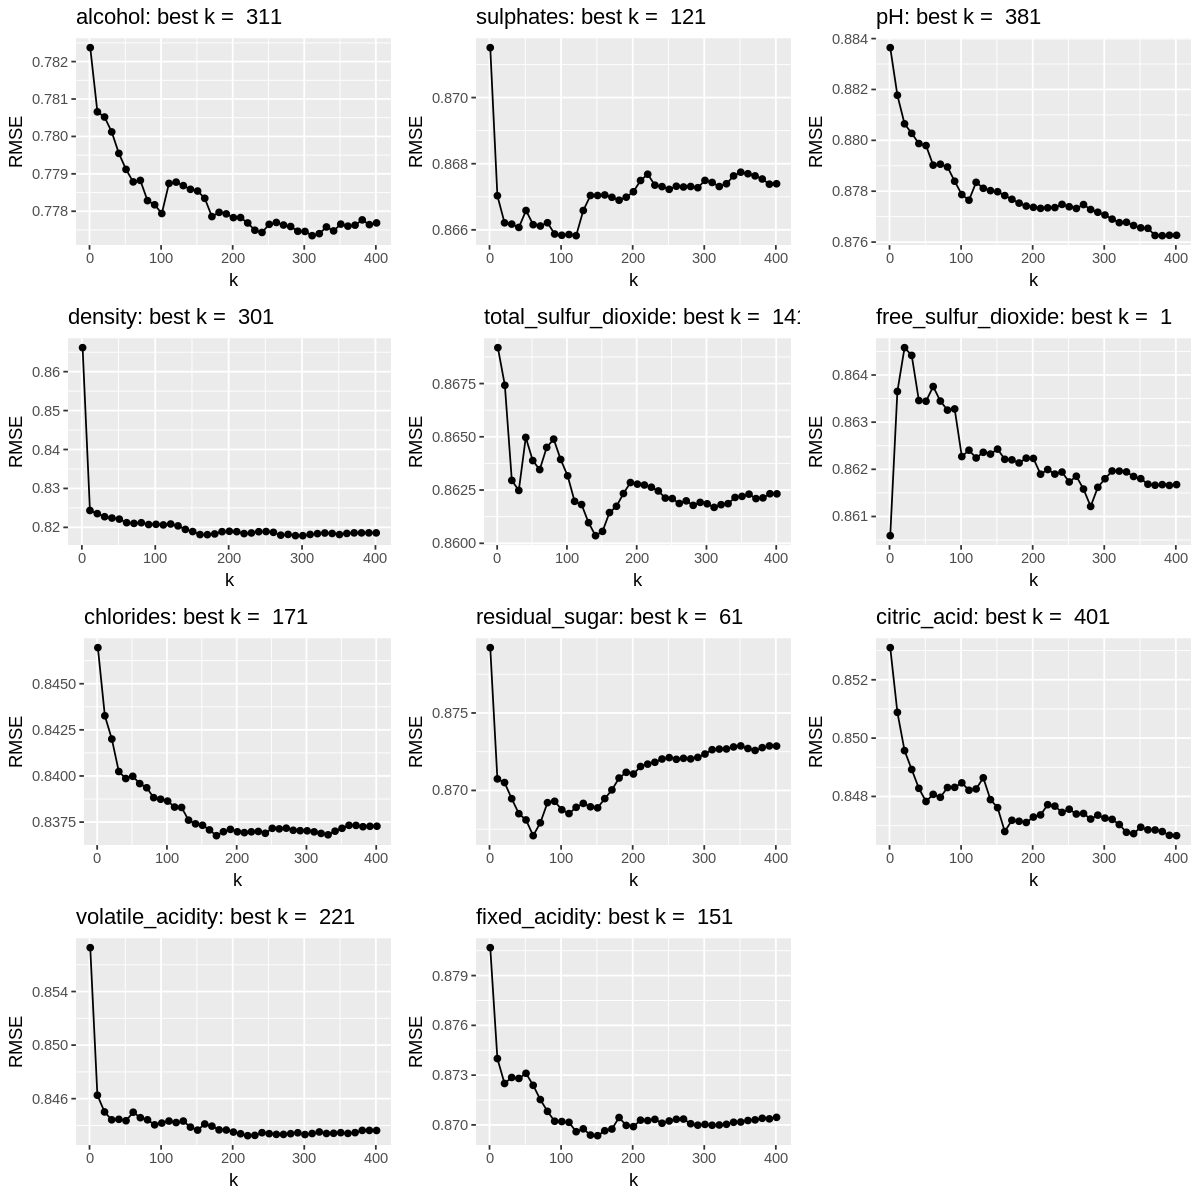

In [95]:
options(repr.plot.width=10,repr.plot.height=10)

# k seems problematic, increasing the range doesnt help, most variables will go with the upper limit ???

choose_k_plot_alcohol <- ggplot(knn_cv_alcohol$results, aes(x = k, y = RMSE)) +
    ggtitle(paste("alcohol: best k = ",best_k_alcohol)) +
    geom_line() +
    geom_point()

choose_k_plot_sulphates <- ggplot(knn_cv_sulphates$results, aes(x = k, y = RMSE)) +
    ggtitle(paste("sulphates: best k = ",best_k_sulphates)) +
    geom_line() +
    geom_point()

choose_k_plot_pH <- ggplot(knn_cv_pH$results, aes(x = k, y = RMSE)) +
    ggtitle(paste("pH: best k = ",best_k_pH)) +
    geom_line() +
    geom_point()

choose_k_plot_density <- ggplot(knn_cv_density$results, aes(x = k, y = RMSE)) +
    ggtitle(paste("density: best k = ",best_k_density)) +
    geom_line() +
    geom_point()

choose_k_plot_total_sulfur_dioxide <- ggplot(knn_cv_total_sulfur_dioxide$results, aes(x = k, y = RMSE)) +
    ggtitle(paste("total_sulfur_dioxide: best k = ",best_k_total_sulfur_dioxide)) +
    geom_line() +
    geom_point()

choose_k_plot_free_sulfur_dioxide <- ggplot(knn_cv_free_sulfur_dioxide$results, aes(x = k, y = RMSE)) +
    ggtitle(paste("free_sulfur_dioxide: best k = ",best_k_free_sulfur_dioxide)) +
    geom_line() +
    geom_point()

choose_k_plot_chlorides <- ggplot(knn_cv_chlorides$results, aes(x = k, y = RMSE)) +
    ggtitle(paste("chlorides: best k = ",best_k_chlorides)) +
    geom_line() +
    geom_point()

choose_k_plot_residual_sugar <- ggplot(knn_cv_residual_sugar$results, aes(x = k, y = RMSE)) +
    ggtitle(paste("residual_sugar: best k = ",best_k_residual_sugar)) +
    geom_line() +
    geom_point()

choose_k_plot_citric_acid <- ggplot(knn_cv_citric_acid$results, aes(x = k, y = RMSE)) +
    ggtitle(paste("citric_acid: best k = ",best_k_citric_acid)) +
    geom_line() +
    geom_point()

choose_k_plot_volatile_acidity <- ggplot(knn_cv_volatile_acidity$results, aes(x = k, y = RMSE)) +
    ggtitle(paste("volatile_acidity: best k = ",best_k_volatile_acidity)) +
    geom_line() +
    geom_point()

choose_k_plot_fixed_acidity <- ggplot(knn_cv_fixed_acidity$results, aes(x = k, y = RMSE)) +
    ggtitle(paste("fixed_acidity: best k = ",best_k_fixed_acidity)) +
    geom_line() +
    geom_point()

grid.arrange(choose_k_plot_alcohol, choose_k_plot_sulphates,choose_k_plot_pH,
             choose_k_plot_density, choose_k_plot_total_sulfur_dioxide, choose_k_plot_free_sulfur_dioxide,
             choose_k_plot_chlorides, choose_k_plot_residual_sugar, choose_k_plot_citric_acid,
             choose_k_plot_volatile_acidity, choose_k_plot_fixed_acidity)

In [96]:
print("alcohol RMSE:")
print(knn_alcohol_final$results$RMSE)

print("sulphates RMSE:")
print(knn_sulphates_final$results$RMSE)

print("pH RMSE:")
print(knn_pH_final$results$RMSE)

print("density RMSE:")
print(knn_density_final$results$RMSE)

print("total_sulfur_dioxide RMSE:")
print(knn_total_sulfur_dioxide_final$results$RMSE)

print("free_sulfur_dioxide RMSE:")
print(knn_free_sulfur_dioxide_final$results$RMSE)

print("chlorides RMSE:")
print(knn_chlorides_final$results$RMSE)

print("residual_sugar RMSE:")
print(knn_residual_sugar_final$results$RMSE)

print("citric_acid RMSE:")
print(knn_citric_acid_final$results$RMSE)

print("volatile_acidity RMSE:")
print(knn_volatile_acidity_final$results$RMSE)

print("fixed_acidity RMSE:")
print(knn_fixed_acidity_final$results$RMSE)



[1] "alcohol RMSE:"
[1] 0.7790413
[1] "sulphates RMSE:"
[1] 0.8672676
[1] "pH RMSE:"
[1] 0.8810475
[1] "density RMSE:"
[1] 0.8140217
[1] "total_sulfur_dioxide RMSE:"
[1] 0.865807
[1] "free_sulfur_dioxide RMSE:"
[1] 0.8728676
[1] "chlorides RMSE:"
[1] 0.8389351
[1] "residual_sugar RMSE:"
[1] 0.8723826
[1] "citric_acid RMSE:"
[1] 0.8485279
[1] "volatile_acidity RMSE:"
[1] 0.8473128
[1] "fixed_acidity RMSE:"
[1] 0.8724854


In [1]:
knn_alcohol_final

ERROR: Error in eval(expr, envir, enclos): object 'knn_alcohol_final' not found
